In [2]:
from manim import *

Manim Community v0.17.3

In [48]:
%%manim -ql -v CRITICAL prob3d
class prob3d(ThreeDScene):
    def construct(self):
        #by default phi = 0, theta = -90
        phi_init = 45*DEGREES
        self.set_camera_orientation(phi=phi_init, theta=-135*DEGREES,zoom=2)

        axes = ThreeDAxes()
        myRed, myOrange, myYellow, myGreen, myBlue, myPurple = "#ff006d", "#ff7d00", "#ffdd00", "#70b600", "#01befe", "#b555ff"
        
        my_colors = [WHITE, myBlue, myRed, myPurple, myYellow, myGreen, myOrange]
        #               0.     1.     2.      3.        4.       5.       6
        p = Polygon([0,0,0],[1,0,0],[1,1,0],fill_color=BLUE)
        p.set_fill(BLUE,0.9)
        self.add(p)
        self.begin_ambient_camera_rotation(rate=-45*DEGREES, about='theta')
        self.wait(8)
        
        return 0

In [355]:
DELAY = 3 

In [356]:
%%manim -qh -v CRITICAL rvs
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1

def flatten(xss):
    return [x for xs in xss for x in xs]

def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())
    
FINAL_MOBJECTS = None

class rvs(ThreeDScene):
    def construct(self):
        #phi_init = 45*DEGREES
        #self.set_camera_orientation(phi=phi_init, theta=-135*DEGREES,zoom=0.5)
        
        #self.set_camera_orientation(phi=0, theta=-90*DEGREES,gamma=0,set_focal_distance=1000,zoom=1)
        
        
        image = ImageMobject("rv_quote.png")  # Replace with your image file name
        #image.scale(0.5)  # Scale the image
        image.set_width(0.8*config.frame_width)
        image.to_edge(UP)

        # Add the image to the scene
        self.add(image)
        
        self.wait(DELAY)
        
        self.play(FadeOut(image,shift=UP))

        
        
        N = 4
        regions = VGroup()
        labels = VGroup()
        
        COLOR = ['#e81416','#ffa500','#faeb36','#79c314','#487de7','#4b369d','#70369d']
        my_opacity = 0.5
        label_size = 40
        label_buff = 0.1
        
        for i in range(N-1): #sum is 2 to N-1
            z =  0#i+2  
            temp = Polygon([0,1.5+i,z],[0,0.5+i,z],[0.5+i,0,z],[1.5+i,0,z],stroke_width=0)
            temp.set_fill(COLOR[i],my_opacity)
            regions.add(temp)
            
            temp_txt = MathTex(r"\{ Z = ", i+2, " \}",font_size = label_size)
            temp_txt.next_to(temp,LEFT,buff=label_buff)
            temp_txt.set_y(1.0+i)
            temp_txt[1].color = COLOR[i]
            labels.add(temp_txt)
        
        #add center region
        z = 0 #N+1
        temp = Polygon([0.5,N,z],[0,N,z],[0,N-0.5,z],[N-0.5,0,z],[N,0,z],[N,0.5,z],stroke_width=0)
        temp.set_fill(COLOR[N-1],my_opacity)
        regions.add(temp)
        
        temp_txt = MathTex(r"\{ Z = ", N+1, " \}",font_size = label_size)
        temp_txt.next_to(temp,LEFT,buff=label_buff)
        temp_txt.set_y(N)
        temp_txt[1].color = COLOR[N-1]
        labels.add(temp_txt)

        #add top regions
        for i in range(N-1): #sum is N+2 to 2N
            z = 0# N+i+2  
            temp = Polygon([1.5+i,N,z],[0.5+i,N,z],[N,0.5+i,z],[N,1.5+i,z],stroke_width=0)
            temp.set_fill(COLOR[N+i],my_opacity)
            regions.add(temp)
            
            temp_txt = MathTex(r"\{ Z = ", N+i+2, " \}",font_size = label_size)
            temp_txt.next_to(temp,RIGHT,buff=label_buff)
            temp_txt.set_y(1.0+i)
            temp_txt[1].color = COLOR[N+i]
            labels.add(temp_txt)
            
        atoms = VGroup()
        atoms_text = VGroup()
        for i in range(N):
            for j in range(N):
                my_h = 0.01
                my_radius = 0.25
                params = {'radius':my_radius,
                          'resolution':(10,10),
                          'height':my_h,
                          'fill_opacity':1,
                          'fill_color':WHITE} #COLOR[i+j]}
                temp = Cylinder(**params)
                temp.set_x(0.5+i)
                temp.set_y(0.5+j)
                temp.set_z(0.5*my_h)
                atoms.add(temp)
                
                temp = MathTex(i+1,",",j+1,font_size=25,color=BLACK)
                temp.set_x(0.5+i)
                temp.set_y(0.5+j)
                temp.set_z(0.01)
                atoms_text.add(temp)
        
        
        all_stuff = VGroup(atoms,atoms_text,regions,labels)
        
        all_stuff.set_y(0.45)
        all_stuff.to_edge(RIGHT)
        
        #self.add(all_stuff)
        #self.wait(1)
        #return 0
    
        rectangle = SurroundingRectangle(atoms)
        left_brace = BraceBetweenPoints(
            rectangle.get_corner(UL),  # Upper left corner
            rectangle.get_corner(DL),  # Lower left corner
            direction=LEFT
        )
        right_brace = BraceBetweenPoints(
            rectangle.get_corner(UR),  # Upper left corner
            rectangle.get_corner(DR),  # Lower left corner
            direction=RIGHT
        )
        
        
        text = MathTex(r"\text{Let }Z\text{ be the sum of two fair 4 sided dice.}",font_size = 55)
        text.to_edge(UP,buff=0.25)
        self.play(FadeIn(text,shift=DOWN))
        self.wait(DELAY)
        self.add_fixed_in_frame_mobjects(text)
        
        
        omega = MathTex(r"\Omega = ",font_size=100).next_to(left_brace,LEFT)
        prob = MathTex(r"\mathbb{P}(\omega) = 1/16",font_size=90).next_to(rectangle,DOWN)
        
        
        self.play(FadeIn(omega),FadeIn(left_brace),FadeIn(right_brace),FadeIn(atoms),FadeIn(atoms_text))
        self.wait(DELAY)
        
        self.play(FadeIn(prob,shift=DOWN))
        self.wait(DELAY)
        
        #return 0
        
        
        
        
        h1 = 50
        h2 = 45
        eqn_size = 55
        
        text_2 = MathTex(r"Z\text{ yields a collection of events}",font_size = h1)
        text_2.next_to(text,DOWN,buff=0.2)
        text_2.to_edge(LEFT,buff=0.2)
        self.play(FadeIn(text_2,shift=DOWN))
        self.add_fixed_in_frame_mobjects(text_2)
        self.wait(DELAY)
        
        self.play(FadeIn(regions[0:3],shift=LEFT),FadeIn(regions[3]),FadeIn(regions[4:],shift=RIGHT))
        self.wait(DELAY)
        
        
        self.play(FadeIn(labels[0:4],shift=LEFT),FadeIn(labels[4:],shift=RIGHT),FadeOut(prob,omega,left_brace,right_brace,shift=DOWN))
        self.wait(DELAY)
        
        
        text_3 = MathTex(r"\text{Disjoint and Exhaustive}",font_size = h2)
        text_3.next_to(text_2,DOWN)
        text_3.to_edge(LEFT,buff=0.5)
        self.play(FadeIn(text_3,shift=DOWN))
        self.wait(DELAY)
        self.add_fixed_in_frame_mobjects(text_3)
        

        text_4 = MathTex(r"\implies \text{Exactly ONE occurs}",font_size = h2)
        text_4.next_to(text_3,DOWN)
        text_4.to_edge(LEFT,buff=0.5)
        self.play(FadeIn(text_4,shift=DOWN))
        self.wait(DELAY)
        self.add_fixed_in_frame_mobjects(text_4)
        
        text_5 = MathTex(r"Z\text{ is a function on }\Omega",font_size = h1)
        text_5.next_to(text_4,DOWN)
        text_5.to_edge(LEFT,buff=0.2)
        self.play(FadeIn(text_5,shift=DOWN))
        self.wait(DELAY)
        self.add_fixed_in_frame_mobjects(text_5)
        
        
        text_6 = MathTex(r"Z: \Omega \to \{","2",",","3",",","4",",","5",",","6",",","7",",","8",r"\}",font_size = h2)
        text_6.set_color_by_tex('2',COLOR[0])
        text_6.set_color_by_tex('3',COLOR[1])
        text_6.set_color_by_tex('4',COLOR[2])
        text_6.set_color_by_tex('5',COLOR[3])
        text_6.set_color_by_tex('6',COLOR[4])
        text_6.set_color_by_tex('7',COLOR[5])
        text_6.set_color_by_tex('8',COLOR[6])
        
        text_6.next_to(text_5,DOWN)
        text_6.to_edge(LEFT,buff=0.5)
        self.play(FadeIn(text_6,shift=DOWN))
        self.wait(DELAY)
        self.add_fixed_in_frame_mobjects(text_6)
        
        
        
        
        #return 0
        #self.wait(1)
        
        #animate the z axis growing
        z_scale = 0.3
        for i in range(2*N-1): #sum is 2 to N-1
            regions[i].generate_target()
            regions[i].target.set_z(z_scale*(i+1))
        
        for i in range(N):
            for j in range(N):
                atoms[N*i+j].generate_target()
                my_radius = 0.25
                my_h = z_scale*(i+j+2)
                params = {'radius':my_radius,
                          'resolution':(10,10),
                          'height':my_h,
                          'fill_opacity':1,
                          'fill_color':COLOR[i+j],
                          'checkerboard_colors':[COLOR[i+j],COLOR[i+j]]}
                temp = Cylinder(**params)
                temp.set_x(atoms[N*i+j].get_x())
                temp.set_y(atoms[N*i+j].get_y())
                temp.set_z(0.5*my_h)
                
                atoms[N*i+j].target = temp
                
                atoms_text[N*i+j].generate_target()
                atoms_text[N*i+j].target.set_z(my_h)
                
        self.play(*[MoveToTarget(atoms_text[i+N*j]) for i in range(N) for j in range(N)],
                  *[MoveToTarget(atoms[i+N*j]) for i in range(N) for j in range(N)],
                  *[MoveToTarget(regions[i]) for i in range(2*N-1)])
        self.wait(2)
        #self.move_camera(phi=45*DEGREES)
        stuff = VGroup(labels,atoms_text,atoms,regions)
        self.play(Rotate(stuff,angle=-45*DEGREES,axis=[1,0,0]))
        
        
        self.wait(DELAY)
        
        # Define an updater function for rotating the cube
        def rotate_updater(mob, dt, framerate = 15):
            mob.rotate(PI * dt/framerate, axis=[0,0,1])  # Rotate around the UP axis

        # Add the updater to the cube
        #all_stuff.add_updater(rotate_updater)

        # Let the animation run for 5 seconds
        #self.wait(1)
        
        #return 0
        
        
        text_7 = MathTex(r"Z",r"(\omega)", "=","\omega_1", "+", "\omega_2",font_size = eqn_size)
        #self.add_fixed_in_frame_mobjects(text_7)
        
        text_7.next_to(text_6,DOWN)
        text_7.to_edge(LEFT,buff=0.5)
        self.play(FadeIn(text_7,shift=DOWN))
        self.wait(DELAY)
        
        ##
        
        text_8 = MathTex(r"\{Z=","5",r"\} = \{ \omega : Z(\omega) = ","5","\}",font_size=eqn_size)
        self.add_fixed_in_frame_mobjects(text_8)
        
        text_8.set_color_by_tex('5', COLOR[3])
        text_8.next_to(all_stuff,DOWN,buff=0.4)
        self.play(FadeIn(text_8,shift=DOWN))
        self.wait(DELAY)
        
        
        
        
        text_9 = MathTex(r"Z",r"(\omega)", "=",r"X_1",r"(\omega)","+",r"X_2",r"(\omega)",font_size = eqn_size)
        text_9_alt = MathTex(r"Z", "=",r"X_1","+",r"X_2",font_size = eqn_size)
        ##self.add_fixed_orientation_mobjects(text_9,text_9_alt)
        #return 0
    
        text_9.next_to(text_6,DOWN)
        text_9_alt.next_to(text_6,DOWN)
        
        text_9.align_to(text_7,LEFT)
        text_9_alt.set_x(text_9.get_x())
        
        self.play(TransformMatchingTex(text_7,text_9))
        self.wait(DELAY)
        
        self.play(TransformMatchingTex(text_9,text_9_alt))
        self.wait(DELAY)
        
        
        text_10 = MathTex(r"\mathbb{E}[Z] = ",r"\sum_{\omega \in \Omega}",r"Z",r"(\omega)",r"\mathbb{P}(\omega)",font_size=eqn_size)
        text_10b = MathTex(r"\mathbb{E}[Z] = ",r"\sum_{\omega \in \Omega}",r"(",r"X_1",r"(\omega)","+",r"X_2",r"(\omega)",r")",r"\mathbb{P}(\omega)",font_size=eqn_size)
        text_10c = MathTex(r"\mathbb{E}[Z] = ",r"\sum_{\omega \in \Omega}",r"X_1",r"(\omega)",r"\mathbb{P}(\omega)",r"+",r"\sum_{\omega \in \Omega}",r"X_2",r"(\omega)",r"\mathbb{P}(\omega)",font_size=eqn_size)
        text_10d = MathTex(r"\mathbb{E}[Z] = ",r"\mathbb{E}[",r"X_1",r"]",r"+",r"\mathbb{E}[",r"X_2",r"]",font_size=eqn_size)
        
        
        text_10.next_to(all_stuff,DOWN,buff=0.4)
        text_10b.next_to(all_stuff,DOWN,buff=0.4).to_edge(RIGHT)           
        text_10c.next_to(all_stuff,DOWN,buff=0.4).to_edge(RIGHT)
        text_10d.next_to(all_stuff,DOWN,buff=0.4)
        
        self.play(FadeOut(text_8,shift=DOWN),FadeIn(text_10,shift=DOWN))
        self.wait(DELAY)
        
        self.play(TransformMatchingTex(text_10,text_10b))
        self.wait(DELAY)
                           
                           
        self.play(TransformMatchingTex(text_10b,text_10c))
        self.wait(DELAY)
                           
                              
        self.play(TransformMatchingTex(text_10c,text_10d))
        self.wait(DELAY)
        #self.add_fixed_in_frame_mobjects(text_9)
        
        global FINAL_MOBJECTS
        FINAL_MOBJECTS = stuff
        
        remove_list = [text,text_2,text_3,text_4,text_5,text_6,text_9_alt,text_10d]
        self.play(*[FadeOut(mob) for mob in remove_list])
        self.wait(DELAY)
        
        
        
        
        #self.begin_ambient_camera_rotation(rate=+45*DEGREES, about='theta')
        #self.wait(2)

<string>:29: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


In [357]:
%%manim -qh -v CRITICAL pdf_vs_rvs
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1

def flatten(xss):
    return [x for xs in xss for x in xs]

def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())

class pdf_vs_rvs(ThreeDScene):
    def construct(self):
        my_RV = FINAL_MOBJECTS.copy()
        self.add(my_RV)
        
        P = np.array([1,2,3,4,3,2,1])
        COLOR = ['#e81416','#ffa500','#faeb36','#79c314','#487de7','#4b369d','#70369d']
        
        HIST_WIDTH = 4
        HIST_HEIGHT = 2.5
        x_font_size = 30
        chart = BarChart(
            values=P,
            bar_names=np.arange(2,8+1,1),
            y_range=[0,1.0*np.max(P),0.25*np.max(P)],
            bar_colors = COLOR,
            x_length=HIST_WIDTH,
            y_length=HIST_HEIGHT,
            x_axis_config={"font_size": x_font_size},
            y_axis_config={"font_size": 1, "line_to_number_buff":0}
        )
        y_label = MathTex(r"\mathbb{P}(Z=z)",font_size = 50).rotate(90*DEGREES).next_to(chart,LEFT)
        #c_bar_lbls = chart.get_bar_labels(font_size=48)
        #for i in range(7):
        #    temp = MathTex(P[i],r"\over",r"16",font_size = 26)
        #    temp.color = BLACK #c_bar_lbls[i].color
        #    temp.set_x(c_bar_lbls[i].get_x())
        #    temp.next_to(c_bar_lbls[i], DOWN, aligned_edge=UP)
        #    
        #    c_bar_lbls[i] = temp
        hist = VGroup(chart,y_label) #,c_bar_lbls)
        
        #hist.set_width(5)
        
        text = MathTex(r"\text{Probability Distribution vs. R.V.}",font_size = 76)
        text.to_edge(UP,buff=0.2)
        
        hist.next_to(text,DOWN)
        hist.to_edge(LEFT)
        
        
        self.play(FadeIn(text,shift=DOWN))
        self.wait(DELAY)
        
        vs = MathTex(r"\text{vs}.",font_size=50)
        vs.next_to(my_RV,LEFT)
        
        self.play(FadeIn(vs,shift=LEFT),Transform(my_RV.copy(),hist))
        self.wait(DELAY)
        
        eqn_size = 55
        text_10 = MathTex(r"\mathbb{E}[Z] = ",r"\sum_{\omega \in \Omega}",r"Z",r"(\omega)",r"\mathbb{P}(\omega)",font_size=eqn_size)
        text_10.next_to(my_RV,DOWN,buff=0.4)
        
        alt_E = MathTex(r"\mathbb{E}[Z] = ",r"\sum_{z \in \mathbb{R}} z \mathbb{P}(Z=z)",font_size = eqn_size)
        alt_E.next_to(hist,DOWN)
        
        self.play(FadeIn(text_10,alt_E,shift=DOWN))
        
        self.wait(DELAY)
        
        self.play(*[FadeOut(mob) for mob in self.mobjects])
        self.wait(2)

In [358]:
%%manim -qh -v CRITICAL ex_problem
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1

def flatten(xss):
    return [x for xs in xss for x in xs]

def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())

class ex_problem(Scene):
    def construct(self):
        prob_2 = MathTex(r"\text{What is the average number of heads that appear in }n\text{ flips?}",font_size = 45)
        prob_x = MathTex(r"\text{Let }X\text{ be the RV for the number of heads.}",font_size=45)
        prob_2.to_edge(UP)
        #prob_2.next_to(prob,DOWN)
        prob_x.next_to(prob_2,DOWN)
        #self.add(prob,prob_2,prob_x)
        #self.play(FadeIn(prob,shift=DOWN))
        #self.wait(DELAY)
        self.play(FadeIn(prob_2))
        self.wait(DELAY)
        self.play(FadeIn(prob_x,shift=DOWN))
        self.wait(DELAY)
        
        
        s1_text = MathTex(r"\text{Probability Distribution Solution:}",font_size=38)
        s1_text.next_to(prob_x,DOWN)
        s1_text.to_edge(LEFT)
        u1 = Underline(s1_text)
        self.play(FadeIn(s1_text,u1),shift=DOWN)
        self.wait(DELAY)
        
        soln_1 = MathTex(r"\mathbb{P}(X = x)",r" = \binom{n}{x} \frac{1}{2^n}")
        soln_1.next_to(s1_text,DOWN)
        soln_1.to_edge(LEFT)
        
        self.play(FadeIn(soln_1[0],shift=DOWN))
        self.wait(DELAY)
        self.play(FadeIn(soln_1[1],shift=RIGHT))
        self.wait(DELAY)
        
        #soln_1.generate_target()
        #soln_1.target.next_to(prob_x,DOWN)
        
        #return 0
        
        soln_1b = MathTex(r"\mathbb{E}[X] = \sum_{x=0}^n x \binom{n}{x} \frac{1}{2^n} ",r"=\frac{n}{2}")
        soln_1b.next_to(soln_1,DOWN)
        soln_1b.to_edge(LEFT)
        self.play(FadeIn(soln_1b[0],shift=DOWN))
        self.wait(DELAY)
        
        self.play(FadeIn(soln_1b[1],shift=RIGHT))
        self.wait(DELAY)
        
        
        line = Line([-0.5,2.35,0],[-0.5,-3,0])
        s2_text = MathTex(r"\text{Random Variables Only Solution:}",font_size=38)
        s2_text.next_to(prob_x,DOWN)
        s2_text.to_edge(RIGHT)
        
        u2 = Underline(s2_text)
        self.play(Create(line),FadeIn(u2,s2_text,shift=DOWN))
        self.wait(DELAY)
        
        
       
        
        soln_2 = MathTex(r"X", r"=",r"H_1", r"+",r"H_2",r"+",r"\ldots",r"+",r"H_n")
        soln_2b = MathTex(r"\mathbb{E}[",r"X",r"]",r"=",r"\mathbb{E}[",r"H_1",r"]",r"+",r"\ldots",r"+",r"\mathbb{E}[",r"H_n",r"]")
        soln_2c = MathTex(r"\mathbb{E}[",r"X",r"]",r"=",r"\frac{1}{2}",r"+",r"\ldots",r"+",r"\frac{1}{2}",r"=\frac{n}{2}")
        soln_2c[-1].color = BLACK
        
        soln_2.next_to(s2_text,DOWN,buff=0.5)
        soln_2b.next_to(soln_2,DOWN)
        soln_2c.next_to(soln_2b,DOWN)
        
        soln_2b.to_edge(RIGHT)
        soln_2.align_to(soln_2b,RIGHT)
        soln_2.shift(0.05*LEFT)
        soln_2c.align_to(soln_2b,LEFT)
        
        self.play(FadeIn(soln_2,shift=DOWN))
        self.wait(DELAY)
        self.play(TransformMatchingTex(soln_2.copy(),soln_2b))
        self.wait(DELAY)
        self.play(TransformMatchingTex(soln_2b.copy(),soln_2c))
        self.wait(DELAY)
        self.play(FadeIn(soln_2c[-1].copy().set_color(WHITE),shift=RIGHT))
        self.wait(DELAY)
        
        self.wait(2)
        
        

In [ ]:

def make_histogram(min_x,max_x,P,x_font_size=24):
    HIST_WIDTH = 5
    HIST_HEIGHT = 7
    rng = max_x - min_x + 1
    chart = BarChart(
            values=P,
            bar_names=np.arange(min_x,max_x+1,1),
            y_range=[0,1.25*np.max(P),0.25*np.max(P)],
            bar_colors = [HIST_COLOR for _ in range(rng)],
            x_length=HIST_WIDTH,
            y_length=HIST_HEIGHT,
            x_axis_config={"font_size": x_font_size},
            y_axis_config={"font_size": 1, "line_to_number_buff":0}
        )
    return chart

import sympy #from sympy import *
def sum_of_dice_hist(n):
    font_sizes = [None,60,40,30,20,12]
    if n==0:
        return None
    else:
        #n is number of dice to sum up
        x = sympy.symbols("x")
        f = (1/6*(1+x+x**2+x**3+x**4+x**5))**n #fair dice 0-5 valued dice
        ans = sympy.series(f, x, 0, n=5*n+1)
        P = [ans.coeff(x,k) for k in range(5*n+1)]
        #print(P)
        return make_histogram(n,6*n,P,x_font_size=font_sizes[n]) #make_histogram(n,6*n,[ans.coeff(x,k) for k in range(5*n)])


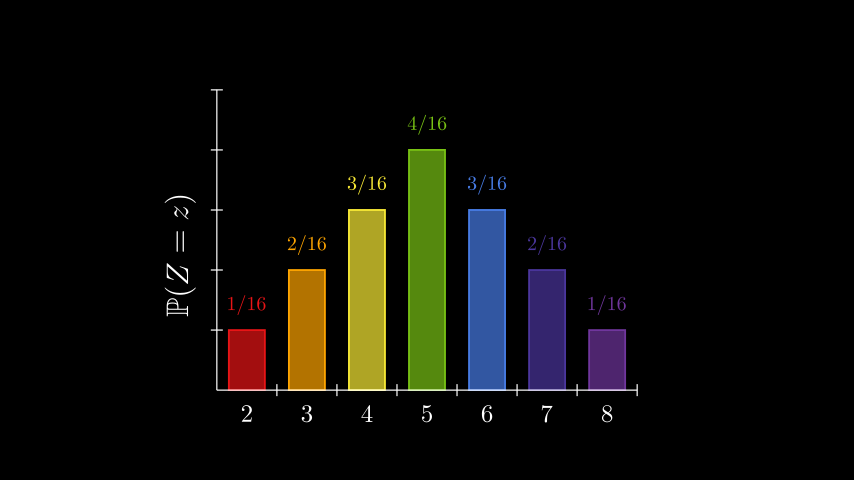

In [285]:
%%manim -ql -v CRITICAL hist
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1

def flatten(xss):
    return [x for xs in xss for x in xs]

def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())

class hist(Scene):
    def construct(self):
        P = np.array([1,2,3,4,3,2,1])
        COLOR = ['#e81416','#ffa500','#faeb36','#79c314','#487de7','#4b369d','#70369d']
        
        HIST_WIDTH = 7
        HIST_HEIGHT = 5
        x_font_size = 40
        chart = BarChart(
            values=P,
            bar_names=np.arange(2,8+1,1),
            y_range=[0,1.25*np.max(P),0.25*np.max(P)],
            bar_colors = COLOR,
            x_length=HIST_WIDTH,
            y_length=HIST_HEIGHT,
            x_axis_config={"font_size": x_font_size},
            y_axis_config={"font_size": 1, "line_to_number_buff":0}
        )
        y_label = MathTex(r"\mathbb{P}(Z=z)",font_size = 50).rotate(90*DEGREES).next_to(chart,LEFT)
        c_bar_lbls = chart.get_bar_labels(font_size=48)
        for i in range(7):
            temp = MathTex(P[i],"/","16",font_size = 32)
            temp.color = c_bar_lbls[i].color
            temp.set_x(c_bar_lbls[i].get_x())
            temp.set_y(c_bar_lbls[i].get_y())
            
            c_bar_lbls[i] = temp
        hist = VGroup(chart,y_label,c_bar_lbls)
        self.add(hist)

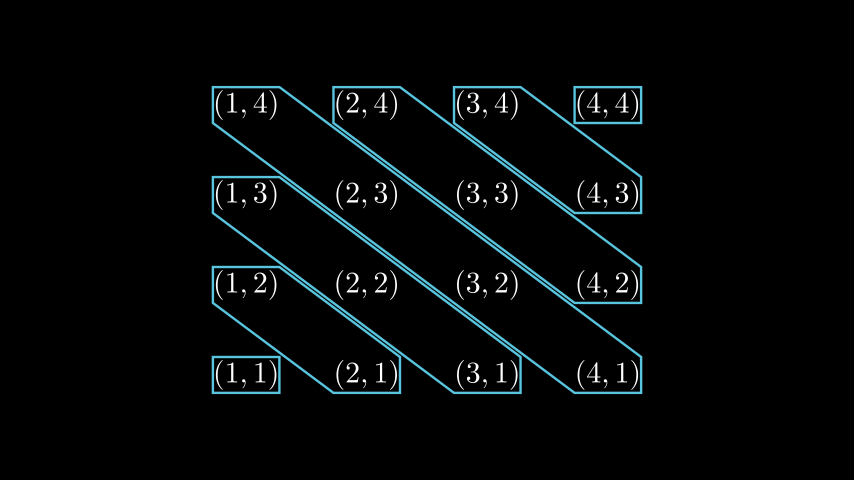

In [41]:
%%manim -ql -v CRITICAL rvs
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1

def flatten(xss):
    return [x for xs in xss for x in xs]

def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())

class rvs(Scene):
    def construct(self):
        N = 4
        combos = [[ MathTex("(",i+1,",",N-j,")") for i in range(N)] for j in range(N)]
        row = [None for i in range(N)]
        for i in range(N):
            row[i] = VGroup(*[combos[i][j] for j in range(N)]).arrange(RIGHT,buff=1.0)
            
        all_combos = VGroup( *row ).arrange(DOWN,buff=1.0)
        self.add(all_combos)
        
        ul_i_list = [3,2,1,0,0,0,0]
        ul_j_list = [0,0,0,0,1,2,3]
        
        br_i_list = [3,3,3,3,2,1,0]
        br_j_list = [0,1,2,3,3,3,3]
        
        
        for ix in range(7):
            ul_guy = SurroundingRectangle(combos[ul_i_list[ix]][ul_j_list[ix]],buff=0.05)
            br_guy = SurroundingRectangle(combos[br_i_list[ix]][br_j_list[ix]],buff=0.05)
            b = Polygon(ul_guy.get_corner(UR),ul_guy.get_corner(UL), ul_guy.get_corner(DL),br_guy.get_corner(DL),br_guy.get_corner(DR),br_guy.get_corner(UR) )
            self.add(b)